In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def force(G, M, m, P, p):
        # According to inverse-square law, force = GMmp/||P-p||^3 
        return G * M * m * (p - P) / np.sum((p - P) ** 2) ** 1.5

def simulate(G, N, M, P, V, A, dt, steps, fsize, clim, plen=20, save=False):
    pos, vel, acc = np.zeros((steps, N, 3)), np.zeros((steps, N, 3)), np.zeros((steps, N, 3))
    pos[0], vel[0], acc[0] = P, V, A
    # simulate
    for i in range(1, steps):
        pos[i] = pos[i - 1] + vel[i - 1] * dt # update position
        for j in range(N):
            for k in range(j + 1, N):
                F = force(G, M[j], M[k], pos[i][j], pos[i][k]) # calculate gravitational force
                acc[i][j], acc[i][k] = acc[i][j] + F / M[j], acc[i][k] - F / M[k] # update acceleration
        vel[i] = vel[i - 1] + acc[i] * dt # update velocity
    fig = plt.figure(figsize=(fsize, fsize)) 
    ax = plt.axes(xlabel='x', ylabel='y', zlabel='z', projection='3d') # plot
    c = np.random.rand(N, 3) # colour for each mass
    if save: # if need all frames, set save=True
        for i in range(0, steps - plen, 1):
            ax.clear() # clear previous plot 
            ax.grid(False) # clear grid
            for j in range(N):
                for k in range(i, i + plen - 2, 2):
                    # set axis range
                    ax.set_xlim(-clim, clim) 
                    ax.set_ylim(-clim, clim)
                    ax.set_zlim(-clim, clim)
                    # plot
                    ax.plot(pos[k:k + 2, j, 0], pos[k:k + 2, j, 1], pos[k:k + 2, j, 2], 
                            c=c[j], alpha=(k + 2 - i) / plen)
            # save plot as .png image
            plt.savefig(f'nbody_sim_gifs/iteration_{i}.png')
    else: # if need only final frame, set save=False
        ax.grid(False) 
        for j in range(N):
            for k in range(0, steps - 2, 1):
                ax.set_xlim(-clim, clim)
                ax.set_ylim(-clim, clim)
                ax.set_zlim(-clim, clim)
                ax.plot(pos[k:k + 2, j, 0], pos[k:k + 2, j, 1], pos[k:k + 2, j, 2], 
                        c=c[j], alpha=((k + 2) / steps) ** 2)
        plt.show() # view plot
    plt.close(fig) # close figure
    return pos, vel, acc # return all positions, velocities and accelerations

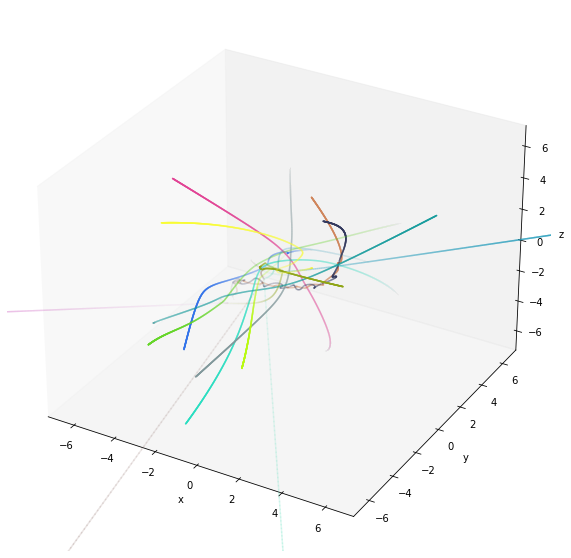

In [3]:
G = 5e-2 # gravitational constant
N = 15 # number of bodies
M = np.abs(np.random.normal(0.5, 3, (N, 3))) # masses 
P = np.random.uniform(-4, 4, (N, 3)) # initial positions
V = np.random.uniform(-0.2, 0.2, (N, 3)) # initial velocities
A = np.zeros((N, 3)) # initial accelerations
dt = 5e-2 # time step size
steps = 500 # iterations
fsize = 10 # figure size
clim = 7 # coordinate bounds
plen = 30 # path trail animation length
pos, vel, acc = simulate(G, 
                         N=N,
                         M=M,
                         P=P, 
                         V=V,
                         A=A,
                         dt=dt,
                         steps=steps, 
                         fsize=fsize,
                         clim=clim)